In [1]:
from sphviewer.tools import QuickView
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import heapq
from scipy.spatial import cKDTree
import matplotlib as mpl
# from pygadgetreader.readgadget.readgadget import readsnap, readhead, readheader
from pygadgetreader import readsnap, readhead, readheader
# import pygadgetreader
import random

In [78]:
def  plot_dm(dm_pos, scale_subhalo, rotation_matrix, file_id, simulation_name ,z,  r = 'infinity', p = 0,v = [6, 10.5], zoom=1):
    if simulation_name == 'zcut7':
        dm_mass = 4.487624628512032e-05 *10**10
    elif simulation_name == '7DM_GAS':
        dm_mass = 5.942038569628494e-06 *10**10
    else:
        print('error!')
        return
    dm_rot = dm_pos.copy()
    # dm_rot[:, :3] = dm_rot[:, :3]
    dm_rot[:, :3] = np.dot(dm_rot[:, :3], rotation_matrix)

    dm_rot = dm_rot[dm_rot[:,0]>(-scale_subhalo)]
    dm_rot = dm_rot[dm_rot[:,0]<(+scale_subhalo)]
    dm_rot = dm_rot[dm_rot[:,1]>(-scale_subhalo)]
    dm_rot = dm_rot[dm_rot[:,1]<(+scale_subhalo)]
    dm_rot = dm_rot[dm_rot[:,2]>(-scale_subhalo)]
    dm_rot = dm_rot[dm_rot[:,2]<(+scale_subhalo)]

    dm_rot_pos = np.hstack((np.array([dm_rot[:,1]]).T, np.array([dm_rot[:,2]]).T,\
                                    np.array([dm_rot[:,0]]).T))
    print(file_id)
    # sphviewer
    dm_mass = np.ones(len(dm_rot_pos)) * dm_mass
    qv_dm_rot = QuickView(dm_rot_pos[:, :3], mass=dm_mass, x=0, y=0, z=0,  r=r, plot=False,  p=p,zoom=zoom)

    img = qv_dm_rot.get_image()
    extent = qv_dm_rot.get_extent()
    fig = plt.figure(1,figsize=(10, 10))
    norm = mpl.colors.Normalize(vmin=v[0], vmax=v[1])
    # imshow
    plt.imshow(img, extent=extent, cmap='gist_stern',origin='lower', norm=norm)
    # plt.imshow(img, extent=extent, cmap='gist_stern',origin='lower')
    # draw_r = 250
    # plt.xlim(-draw_r, draw_r)
    # plt.ylim(-draw_r, draw_r)
    # plt.xlabel('$y\ (kpc)$')
    # plt.ylabel('$z\ (kpc)$')
    plt.axis('off') 
    # plt.title(simulation_name)
    fig.text(0.80, 0.95, "z=%.3f"%z, color='white',fontsize = 20,bbox={'facecolor':'w', 'alpha':0, 'pad':5})
    fig.text(0.05, 0.95, "phy_dis =%.3fMpc"%(scale_subhalo/(1+z)), color='white', fontsize = 20, bbox={'facecolor':'b', 'alpha':0, 'pad':5})
    plt.gca().set_position([0, 0, 1, 1])
    plt.autoscale()
    # plt.savefig('./dm_evolution/'+file_id+'.png')
    # plt.savefig('dm_'+Simulation_name+'dpi1000.png', dpi=1000)
    # 设置参数 bbox_inches='tight', pad_inches=0 
    # plt.gca().set_axis_off()
    # plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
    #             hspace = 0, wspace = 0)
    # plt.margins(0,0)
    fig.savefig('pic/%s/%s.png' % (simulation_name, file_id), bbox_inches='tight', pad_inches=0)

    # plt.close()
    # plt.show()
    return 0

def plot_star(star, scale_star, rotation_matrix, file_id, simulation_name ,z,  r = 'infinity', p = 0,v = [4.3, 8.8], zoom=1):
    star_rot = star.copy()
    star_rot[:,:3] = np.dot(star_rot[:,:3], rotation_matrix)
    star_index = []
    for i in range(len(star)):
        if abs(star_rot[i,0]) < scale_star and abs(star_rot[i,1]) < scale_star and abs(star_rot[i,2]) < scale_star:
            star_index.append(i)
    star_chosen = star_rot[star_index]
    print(len(star_index))
    star_rot_pos1 = np.hstack((np.array([star_chosen[:,1]]).T, np.array([star_chosen[:,2]]).T,
                                    np.array([star_chosen[:,0]]).T))
    star_rot_pos2 = np.hstack((np.array([star_chosen[:,0]]).T, np.array([star_chosen[:,1]]).T,
                                    np.array([star_chosen[:,2]]).T))
    # star_rot_pos = star_rot
    print(file_id)
    # sphviewer
    print(star_rot_pos1.shape)

    # print(np.min)
    qv_1 = QuickView(star_rot_pos1, mass=star_chosen[:,3]*(10e10),  x=0, y=0, z=0, r=r, plot=False, zoom=zoom)
    qv_2 = QuickView(star_rot_pos2, mass=star_chosen[:,3]*(10e10),  x=0, y=0, z=0, r=r, plot=False, zoom=zoom)
    
    plt.figure(figsize=(10, 5.2))
    norm = mpl.colors.Normalize(vmin=v[0], vmax=v[1])
    
    # imshow
    ax1 = plt.subplot(121)
    img = qv_2.get_image()
    extent = qv_2.get_extent()
    ax1.set_title('$Face-on$')
    ax1.imshow(img, extent=extent, cmap='gnuplot2',origin='lower',norm=norm)
    

    ax2 = plt.subplot(122)
    img = qv_1.get_image()
    extent = qv_1.get_extent()
    ax2.set_title('$Edge-on$')
    ax2.imshow(img, extent=extent, cmap='gnuplot2',origin='lower',norm=norm)

    plt.suptitle(simulation_name + ", z=%.3f, phy_dis=%.2fMpc"%(z, scale_star/(1+z)))
    plt.show()
    # plt.close()
    # plt.show()
    return 0

def plot_gas(gas, scale_gas, rotation_matrix, file_id, simulation_name ,z,  r = 'infinity', p = 0,v = [4.3, 8.8], zoom=1):
    gas_rot = gas.copy()
    gas_rot[:,:3] = np.dot(gas_rot[:,:3], rotation_matrix)
    gas_index = []
    for i in range(len(gas)):
        if abs(gas_rot[i,0]) < scale_gas and abs(gas_rot[i,1]) < scale_gas and abs(gas_rot[i,2]) < scale_gas:
            gas_index.append(i)
    gas_chosen = gas_rot[gas_index]
    print(len(gas_index))
    gas_rot_pos1 = np.hstack((np.array([gas_chosen[:,1]]).T, np.array([gas_chosen[:,2]]).T,
                                    np.array([gas_chosen[:,0]]).T))
    gas_rot_pos2 = np.hstack((np.array([gas_chosen[:,0]]).T, np.array([gas_chosen[:,1]]).T,
                                    np.array([gas_chosen[:,2]]).T))
    # gas_rot_pos = gas_rot
    print(file_id)
    # sphviewer
    print(gas_rot_pos1.shape)

    # print(np.min)
    qv_1 = QuickView(gas_rot_pos1, mass=gas_chosen[:,3]*(10e10), x=0, y=0, z=0, r=r, plot=False, zoom=zoom)
    qv_2 = QuickView(gas_rot_pos2, mass=gas_chosen[:,3]*(10e10), x=0, y=0, z=0, r=r, plot=False, zoom=zoom)
    
    plt.figure(figsize=(10, 5.2))
    norm = mpl.colors.Normalize(vmin=v[0], vmax=v[1])
    
    # imshow
    ax1 = plt.subplot(121)
    img = qv_2.get_image()
    extent = qv_2.get_extent()
    ax1.imshow(img, extent=extent, cmap='gnuplot2',origin='lower',norm=norm)
    ax1.set_title('$Face-on$')

    ax2 = plt.subplot(122)
    img = qv_1.get_image()
    extent = qv_1.get_extent()
    ax2.set_title('$Edge-on$')
    ax2.imshow(img, extent=extent, cmap='gnuplot2',origin='lower',norm=norm)

    plt.suptitle(simulation_name + ", z=%.3f, phy_dis=%.2fMpc"%(z, scale_gas/(1+z)))
    plt.show()
    # plt.close()
    # plt.show()
    return 0


def moment_inertia_tensor(m, pos):
    mitensor = np.zeros((3,3))
    for i in range(3):
        pos_new_i = (m*pos[:,i].reshape(-1,1)).reshape(1,-1)
        for j in range(3):
            mitensor[i,j] = np.dot(pos_new_i, pos[:,j].reshape(-1,1))
    return mitensor


def cal_rot_matrix_kdtree(star, subhalo, scale_star, scale_subhalo):
    centre_pos = np.zeros(3)
    kdtree_star_pos = cKDTree(star[:, :3])
    index_star = kdtree_star_pos.query_ball_point(centre_pos, scale_star)
    print(index_star)
    star_sel = star[index_star, :]
    # star_sel[:, :3] = star_sel[:, :3] - centre_pos*np.ones(star_sel[:, :3].shape)
#     print(star_sel.shape)
#     print(np.max(star_sel[:,0]))
    star_mitensor = moment_inertia_tensor(star_sel[:, 3].reshape(-1, 1), star_sel[:, :3])
    print(star_mitensor)
    eigenvalue_star, featurevector_star = np.linalg.eig(star_mitensor)
    
    # subhalo_sel = subhalo[subhalo[:,7]>0]
    kdtree_subhalo_pos = cKDTree(subhalo[:, :3])
    index_subhalo = kdtree_subhalo_pos.query_ball_point(centre_pos, scale_subhalo)
#     print(len(index_subhalo))
    subhalo_sel = subhalo[index_subhalo]

    print(subhalo_sel.shape, star_sel.shape)
    # subhalo_sel[:, :3] = subhalo_sel[:, :3] - centre_pos*np.ones(subhalo_sel[:, :3].shape)
    subhalo_mitensor = moment_inertia_tensor(np.ones(len(subhalo_sel)).reshape(-1, 1), subhalo_sel[:, :3])
    print(subhalo_mitensor)
    eigenvalue_subhalo, featurevector_subhalo = np.linalg.eig(subhalo_mitensor)
    
    e_star = featurevector_star[:,np.argmin(eigenvalue_star)]
    e_subhalo = featurevector_subhalo[:,np.argmin(eigenvalue_subhalo)]
    
    e_x = np.cross(e_star, e_subhalo)
    e_x = e_x/np.linalg.norm(e_x)
    e_z = e_star
    e_y = np.cross(e_z, e_x)
    e_y = e_y/np.linalg.norm(e_y)
    rotation_matrix = np.hstack((e_x.reshape(-1,1),e_y.reshape(-1,1),e_z.reshape(-1,1)))
    print(rotation_matrix)
    
    # kdtree_gas_pos = cKDTree(gas[:, :3])
    
    return rotation_matrix

In [241]:
simulation_name = 'zcut7'
file_ids = np.loadtxt("data/file_id.txt",dtype=str)
h = 0.6777
i = 134
z = np.loadtxt("z.txt")
file_id = file_ids[i]


read

In [242]:
dm1 = np.loadtxt("/data/inspur_disk06/userdir/zhaox/%s/dm_data_2000kpc/%s.txt"%('zcut7', file_id))
dm2 = np.loadtxt("/data/inspur_disk06/userdir/zhaox/%s/dm_data_2000kpc/%s.txt"%('7DM_GAS', file_id))

In [243]:
gas1 = np.loadtxt("/data/inspur_disk06/userdir/zhaox/%s/gas_data_120kpc/%s.txt"%('zcut7', file_id))
gas2 = np.loadtxt("/data/inspur_disk06/userdir/zhaox/%s/gas_data_120kpc/%s.txt"%('7DM_GAS', file_id))

In [244]:
star1 = np.loadtxt("/data/inspur_disk06/userdir/zhaox/%s/star_data_120kpc/%s.txt"%('zcut7', file_id))
star2 = np.loadtxt("/data/inspur_disk06/userdir/zhaox/%s/star_data_120kpc/%s.txt"%('7DM_GAS', file_id))

rotation_matrix

In [255]:
scale_star = 50/1000
# scale_gas = 50/1000
scale_subhalo = 300/1000
rotation_matrix1 = cal_rot_matrix_kdtree(star1/h, dm1/h, scale_star, scale_subhalo)
rotation_matrix2 = cal_rot_matrix_kdtree(star2/h, dm2/h, scale_star, scale_subhalo)

[11822, 7990, 11904, 11913, 11830, 11912, 11835, 11832, 11918, 27880, 11924, 11825, 11905, 11824, 27847, 11826, 11907, 11903, 11831, 7989, 7985, 7986, 11836, 27874, 27867, 11834, 11842, 27879, 27873, 27868, 11838, 11841, 27851, 27850, 27849, 27862, 27861, 27863, 27859, 27858, 27855, 27860, 27854, 11845, 11847, 11853, 11901, 11906, 11850, 11895, 11848, 11849, 11860, 11851, 11846, 11861, 11844, 11859, 11837, 11894, 11888, 11862, 11852, 11871, 11875, 11873, 11872, 11876, 11891, 11890, 11874, 11865, 11902, 11892, 11877, 8029, 8030, 8028, 9076, 9069, 9082, 9070, 8033, 9075, 9074, 27869, 8027, 9090, 9080, 9077, 8981, 9000, 8991, 9078, 8995, 8999, 8990, 8998, 9151, 9071, 9154, 9073, 27872, 9095, 9072, 9084, 9099, 9105, 9121, 27865, 9081, 9104, 9083, 9098, 9097, 9096, 9101, 27864, 9091, 9093, 27866, 9108, 9119, 9094, 9092, 9109, 9100, 9089, 8966, 8962, 8978, 11843, 8935, 8968, 8979, 8983, 8961, 8980, 8936, 8988, 8982, 8989, 9103, 27853, 9123, 9153, 9157, 27852, 9102, 9152, 9129, 9124, 9128, 91

dm

In [258]:
v=[6,10.5]
scale_subhalo = 300/1000*(1+z[i])
tan_225 = 0.41421356237
zoom = 1/tan_225
p = 0
r = scale_subhalo/tan_225

134_z001p000


0

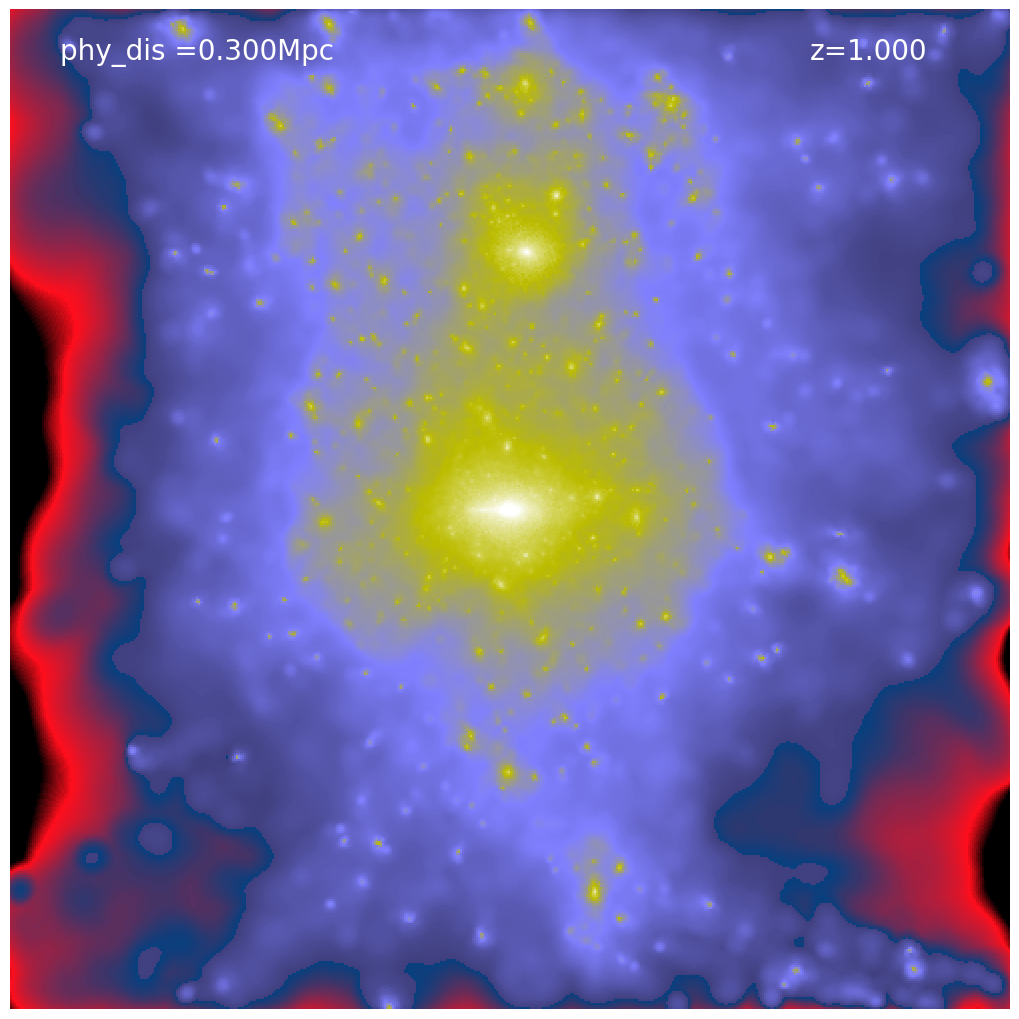

In [253]:
plot_dm(dm1/h, scale_subhalo, rotation_matrix1, file_id, 'zcut7', z[i] , r = r, p = p, v=v, zoom=zoom)

134_z001p000


0

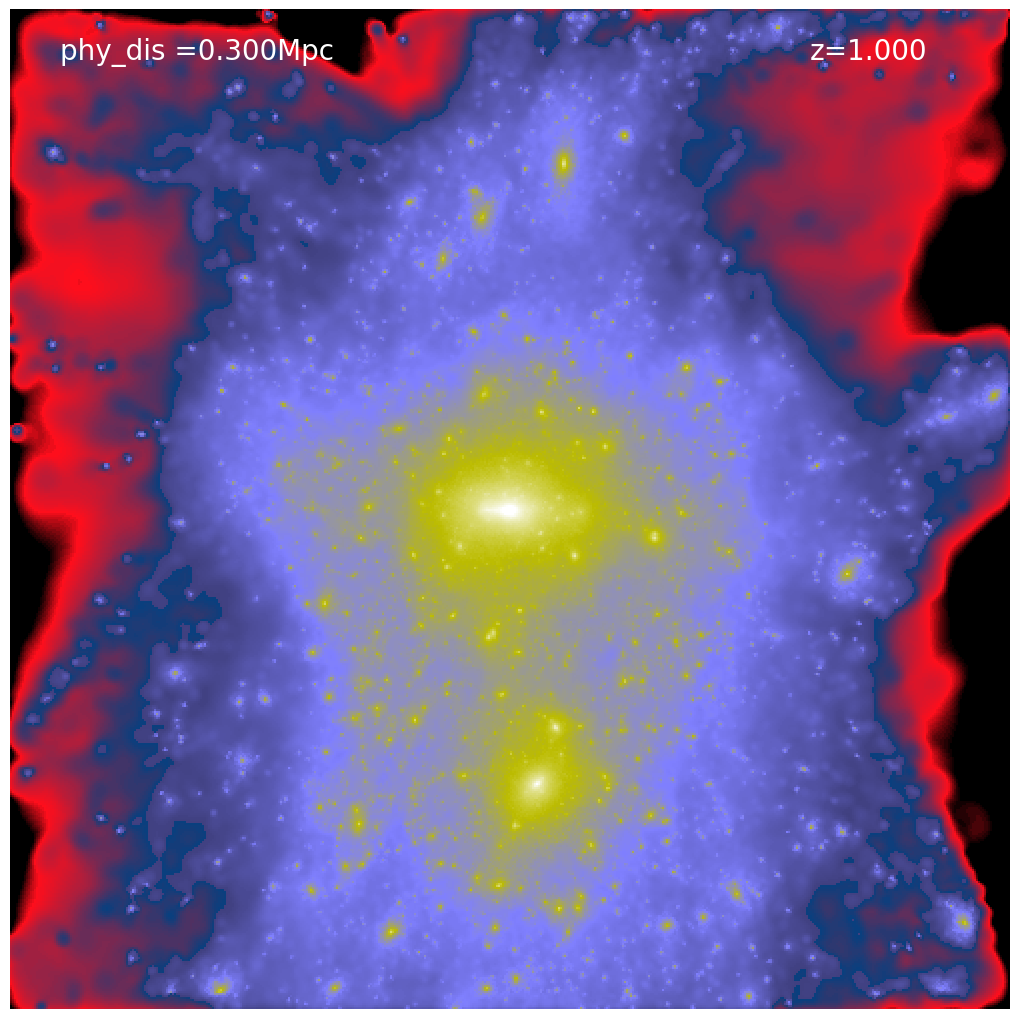

In [259]:
plot_dm(dm2/h, scale_subhalo, rotation_matrix2, file_id, '7DM_GAS', z[i], r = r, p = p, v=v, zoom=zoom)

134_z001p000


0

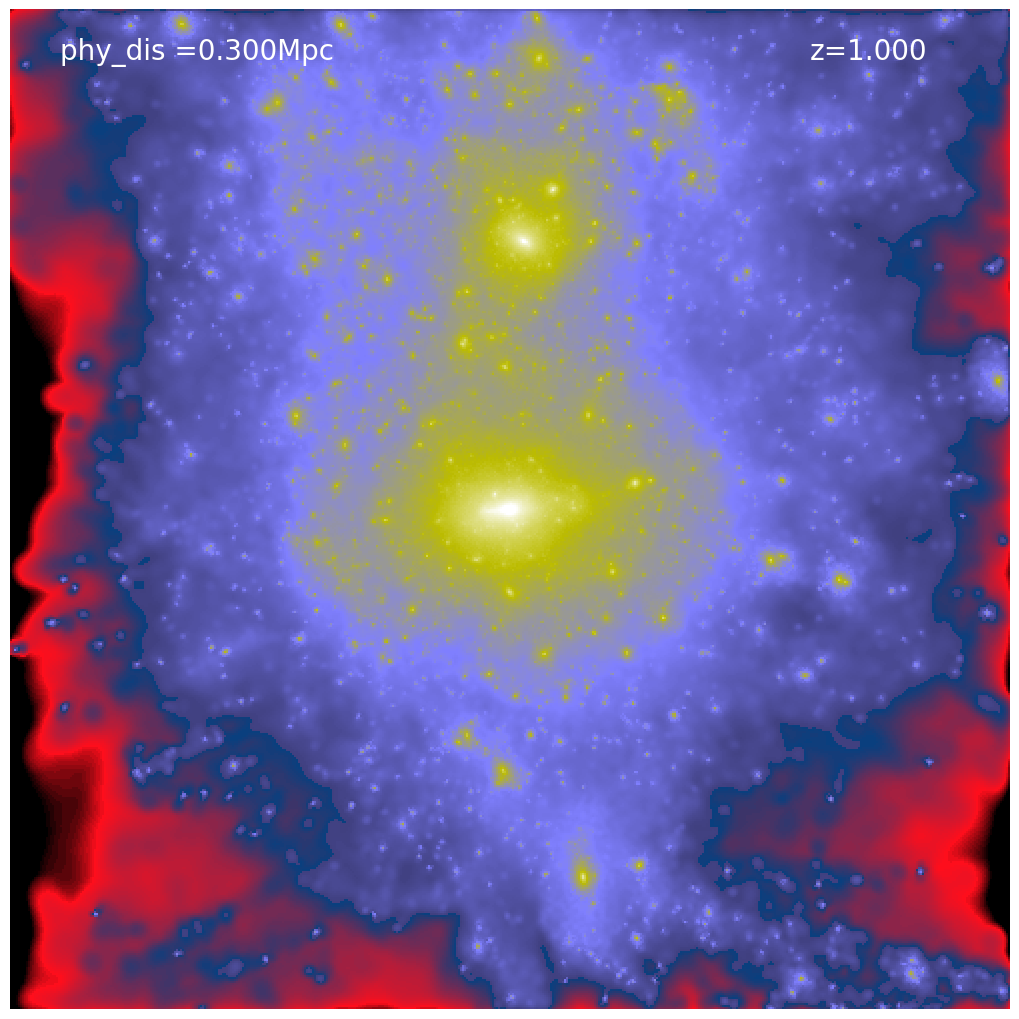

In [254]:
plot_dm(dm2/h, scale_subhalo, rotation_matrix1, file_id, '7DM_GAS', z[i], r = r, p = p, v=v, zoom=zoom)

gas

In [228]:
v=[6,9.5]
scale_subhalo = 50/1000
tan_225 = 0.41421356237
zoom = 1/tan_225
r = scale_subhalo/tan_225
p = 0 

In [229]:
gas1.shape

(354701, 4)

In [230]:
gas2.shape

(401454, 4)

In [231]:
rotation_matrix2

array([[-0.96358032,  0.23920354, -0.11956014],
       [-0.19420207, -0.31856613,  0.92779371],
       [ 0.18384373,  0.91722259,  0.35341788]])

116464
199_z000p000
(116464, 3)


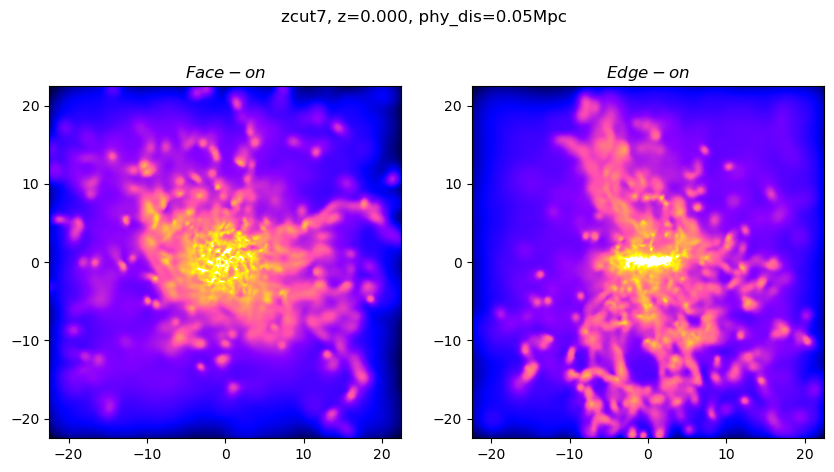

139737
199_z000p000
(139737, 3)


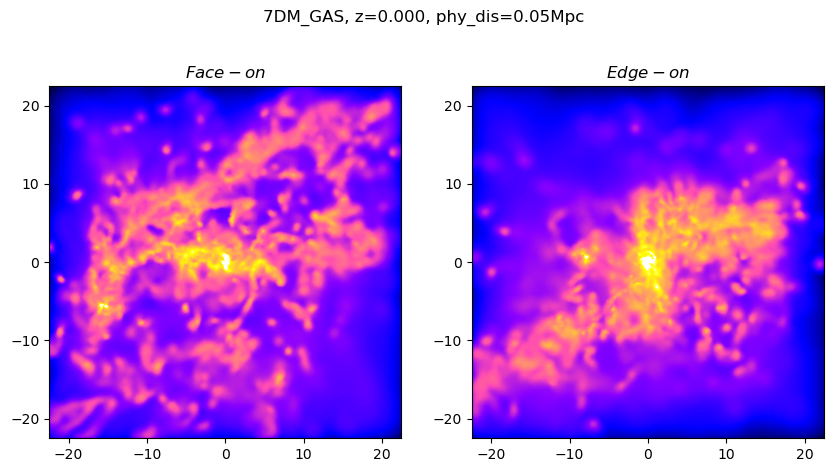

0

In [232]:
plot_gas(gas1/h, scale_subhalo, rotation_matrix1, file_id, 'zcut7', z[i] , r = r, p = p, v=v, zoom=zoom)
plot_gas(gas2/h, scale_subhalo, rotation_matrix2, file_id, '7DM_GAS', z[i], r = r, p = p, v=v, zoom=zoom)

star

In [233]:
scale_star = 20/1000
# scale_gas = 50/1000
scale_subhalo = 300/1000
rotation_matrix1 = cal_rot_matrix_kdtree(star1/h, dm1/h, scale_star, scale_subhalo)
rotation_matrix2 = cal_rot_matrix_kdtree(star2/h, dm2/h, scale_star, scale_subhalo)

[119028, 119133, 118969, 118800, 118850, 114081, 114085, 114051, 114049, 118842, 114037, 119149, 119073, 119074, 119251, 119280, 119252, 119254, 119200, 119256, 119265, 119051, 119048, 119264, 119050, 119049, 119098, 119103, 119085, 119139, 119102, 119097, 119083, 119137, 119089, 119147, 119099, 119128, 119082, 119127, 119071, 119125, 119100, 119134, 119101, 118845, 118885, 119104, 118878, 118886, 118887, 118894, 118874, 118857, 118862, 119135, 118856, 118861, 119129, 118844, 119136, 119126, 119113, 119132, 119064, 119055, 118997, 119029, 119026, 119052, 119027, 119053, 119025, 119001, 119030, 119002, 119047, 119045, 119043, 119046, 119044, 119023, 119022, 118982, 118860, 118998, 118999, 118859, 119130, 118855, 118866, 118858, 118968, 118983, 118988, 118967, 119009, 118966, 119007, 118981, 119019, 118973, 119000, 118976, 118974, 118970, 86410, 86440, 86361, 86439, 86360, 86426, 86437, 86427, 86357, 86394, 86396, 86392, 114407, 114412, 86391, 167610, 61706, 167612, 167611, 114120, 11908

In [234]:
v=[6,9.5]
scale_subhalo = 50/1000
tan_225 = 0.41421356237
zoom = 1/tan_225
r = scale_subhalo/tan_225
p = 0 

127666
199_z000p000
(127666, 3)


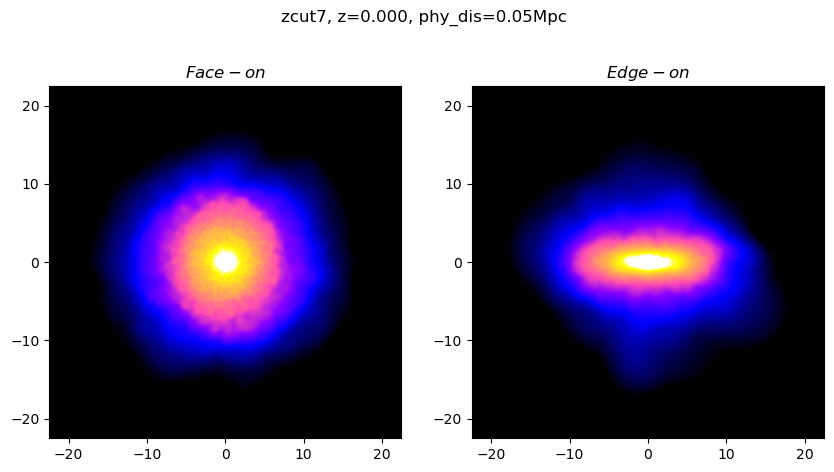

125560
199_z000p000
(125560, 3)


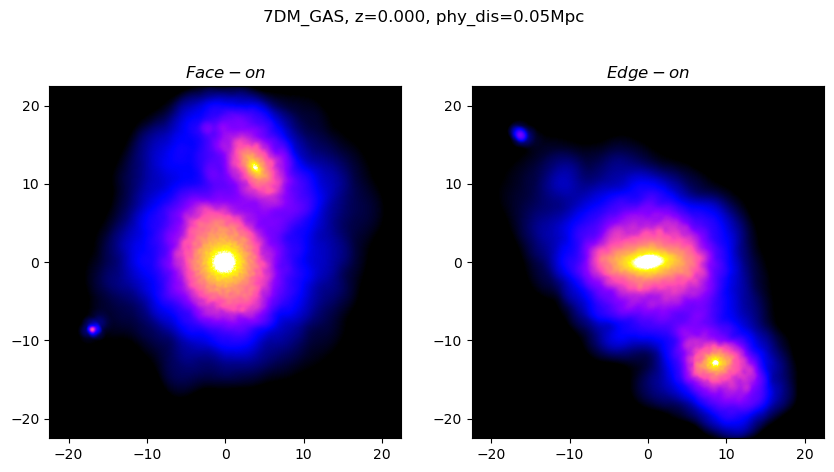

0

In [235]:
plot_star(star1/h, scale_subhalo, rotation_matrix1, file_id, 'zcut7', z[i] , r = r, p = p, v=v, zoom=zoom)
plot_star(star2/h, scale_subhalo, rotation_matrix2, file_id, '7DM_GAS', z[i], r = r, p = p, v=v, zoom=zoom)